In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2024-03-23 08:51:00.941423: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 08:51:00.941558: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 08:51:01.059074: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
import os
from glob import glob
import pathlib

In [9]:
data_dir = "/kaggle/input/2-plant/Medicinal plant dataset/Medicinal plant dataset"
data_dir = pathlib.Path(data_dir).with_suffix('')

In [11]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

5945


In [14]:
batch_size = 32
img_height = 256
img_width = 256

In [15]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed=2118,
    image_size=(img_height, img_width),
    batch_size = batch_size)

Found 5945 files belonging to 40 classes.
Using 4756 files for training.


In [16]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 2118,
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 5945 files belonging to 40 classes.
Using 1189 files for validation.


In [19]:
class_name = train_ds.class_names
print(class_name)

['Aloevera', 'Amla', 'Amruta_Balli', 'Arali', 'Ashoka', 'Ashwagandha', 'Avacado', 'Bamboo', 'Basale', 'Betel', 'Betel_Nut', 'Brahmi', 'Castor', 'Curry_Leaf', 'Doddapatre', 'Ekka', 'Ganike', 'Gauva', 'Geranium', 'Henna', 'Hibiscus', 'Honge', 'Insulin', 'Jasmine', 'Lemon', 'Lemon_grass', 'Mango', 'Mint', 'Nagadali', 'Neem', 'Nithyapushpa', 'Nooni', 'Pappaya', 'Pepper', 'Pomegranate', 'Raktachandini', 'Rose', 'Sapota', 'Tulasi', 'Wood_sorel']


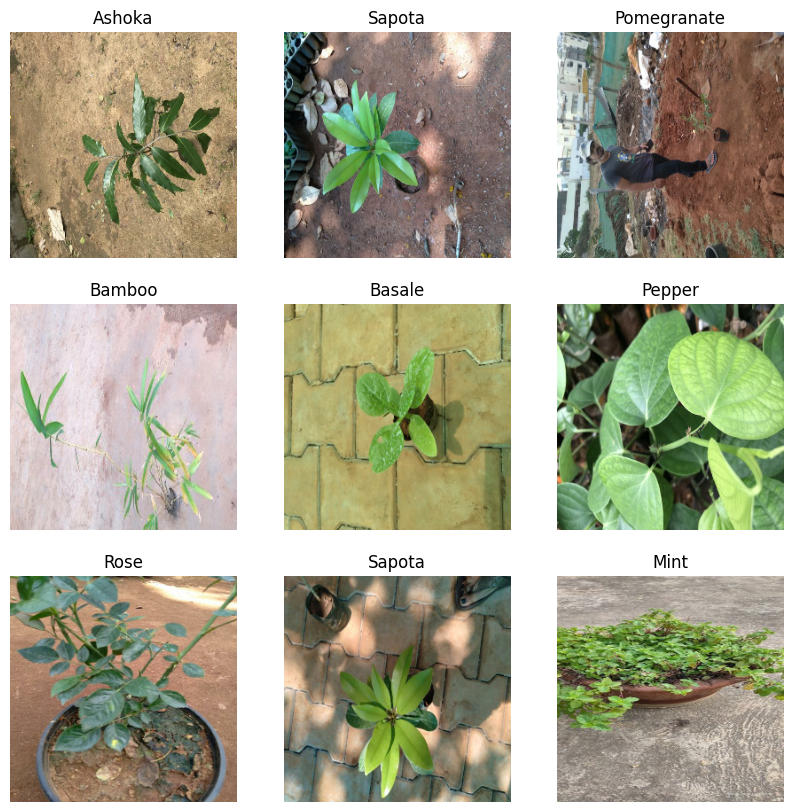

In [21]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_name[labels[i]])
        plt.axis("off")

plt.show()

In [23]:
for images_batch, labels_batch in train_ds:
    print(images_batch.shape)
    print(labels_batch.shape)
    break

(32, 256, 256, 3)
(32,)


In [24]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [25]:
num_classes = len(class_name)

In [28]:
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization

In [29]:
model = Sequential()

model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', name='Conv2D_2'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_1'))
model.add(Dropout(0.25))
model.add(BatchNormalization()),
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_3'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', name='Conv2D_4'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_2'))
model.add(Dropout(0.25))
model.add(BatchNormalization()),
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', name='Conv2D_5'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', name='Conv2D_6'))
model.add(MaxPool2D(pool_size=(2,2), name='Maxpool_3'))
model.add(BatchNormalization()),
model.add(Flatten())
model.add(Dense(units=512, activation='relu', name='Dense_1'))
model.add(Dropout(0.5))
model.add(BatchNormalization()),
model.add(Dense(units=128, activation='relu', name='Dense_2'))
model.add(Dense(units=num_classes, activation='softmax', name='Output'))

In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_2 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Maxpool_1 (MaxPooling2D)        │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 127, 127, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_3 (Conv2D)               │ (None, 127, 127, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_4 (Conv2D)               │ (None, 125, 125, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Maxpool_2 (MaxPooling2D)        │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 62, 62, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_5 (Conv2D)               │ (None, 62, 62, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2D_6 (Conv2D)               │ (None, 60, 60, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Maxpool_3 (MaxPooling2D)        │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 512)            │    58,982,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 40)             │         5,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,334,440 (226.34 MB)

 Trainable params: 59,332,968 (226.34 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [33]:
from keras.optimizers import RMSprop
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [36]:
import time
from keras.callbacks import ModelCheckpoint, EarlyStopping

epochs = 50
batch_size=32
 
checkpointer = ModelCheckpoint(filepath = "/kaggle/working/apic_Best.keras", save_best_only = True, verbose = 1)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_accuracy', patience = 3, verbose = 1, factor = 0.5, minlr = 0.00001)
 

start = time.time()
 
history=model.fit(train_ds,
                            epochs=epochs,
                            validation_data = val_ds,
                            verbose=1,
                            callbacks=[checkpointer, learning_rate_reduction])
 
end = time.time()
 
duration = end - start
print ('\n This Model took %0.2f seconds (%0.1f minutes) to train for %d epochs'%(duration, duration/60, epochs) )


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2024-03-23 09:17:31.642554: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 5.22285, expected 4.50617
2024-03-23 09:17:31.642612: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 19: 4.83523, expected 4.11855
2024-03-23 09:17:31.642622: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 20: 6.14347, expected 5.42679
2024-03-23 09:17:31.642630: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 21: 5.72417, expected 5.00749
2024-03-23 09:17:31.642639: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 29: 6.00776, expected 5.29109
2024-03-2

  2/149 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.0000e+00 - loss: 4.2063   

I0000 00:00:1711185465.465863      90 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


102/149 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.1227 - loss: 3.5273

2024-03-23 09:17:54.578968: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 129063: 5.98344, expected 5.23058
2024-03-23 09:17:54.579029: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 129317: 5.78699, expected 5.03413
2024-03-23 09:17:54.579039: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 129443: 5.94957, expected 5.19671
2024-03-23 09:17:54.579047: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 129486: 6.49412, expected 5.74126
2024-03-23 09:17:54.579054: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 129487: 6.43173, expected 5.67887
2024-03-23 09:17:54.579063: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 129740: 5.47976, expected 4.7269
2024-03-23 09:17:54.579072: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 129931: 6.04578, expected 5.29292
2024-03-23 09:17:54.5

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.1503 - loss: 3.3731

2024-03-23 09:18:11.436309: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 261557: 4.0671, expected 3.54879
2024-03-23 09:18:11.436450: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 271546: 4.0671, expected 3.54879
2024-03-23 09:18:11.436543: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 281537: 4.0671, expected 3.54879
2024-03-23 09:18:11.436627: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 291528: 4.0671, expected 3.54879
2024-03-23 09:18:11.436724: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 301517: 4.0671, expected 3.54879
2024-03-23 09:18:11.436807: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 311508: 4.0671, expected 3.54879
2024-03-23 09:18:11.436898: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 321499: 4.0671, expected 3.54879
2024-03-23 09:18:11.436927:


Epoch 1: val_loss improved from inf to 5.78943, saving model to /kaggle/working/apic_Best.keras


W0000 00:00:1711185492.912933      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


149/149 ━━━━━━━━━━━━━━━━━━━━ 56s 196ms/step - accuracy: 0.1508 - loss: 3.3702 - val_accuracy: 0.0437 - val_loss: 5.7894 - learning_rate: 0.0010
Epoch 2/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4004 - loss: 2.0660
Epoch 2: val_loss improved from 5.78943 to 2.48563, saving model to /kaggle/working/apic_Best.keras
149/149 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - accuracy: 0.4005 - loss: 2.0653 - val_accuracy: 0.3162 - val_loss: 2.4856 - learning_rate: 0.0010
Epoch 3/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5680 - loss: 1.4625
Epoch 3: val_loss improved from 2.48563 to 1.80302, saving model to /kaggle/working/apic_Best.keras
149/149 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.5679 - loss: 1.4628 - val_accuracy: 0.4693 - val_loss: 1.8030 - learning_rate: 0.0010
Epoch 4/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6383 - loss: 1.1812
Epoch 4: val_loss did not improve from 1.80302
149/149 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.6383 

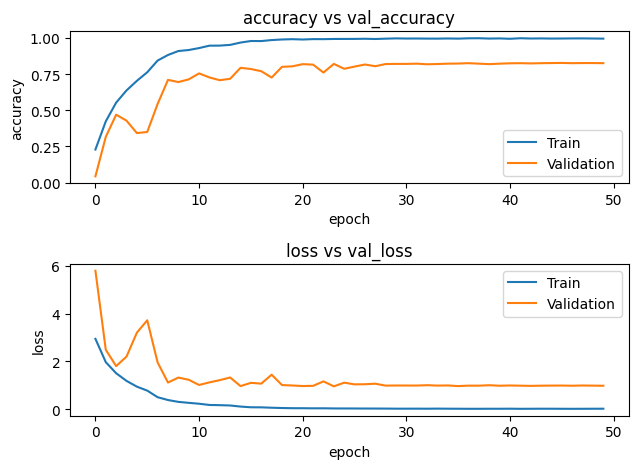

In [37]:
import matplotlib.pyplot as plt 
def plot(history):
    plt.figure(1)

 
    plt.subplot(211)  
    plt.plot(history.history['accuracy'])  
    plt.plot(history.history['val_accuracy'])  
    plt.title('accuracy vs val_accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('epoch')  
    plt.legend(['Train', 'Validation'], loc='lower right')  
 
 
    plt.subplot(212)  
    plt.plot(history.history['loss'])  
    plt.plot(history.history['val_loss'])  
    plt.title('loss vs val_loss')  
    plt.ylabel('loss')  
    plt.xlabel('epoch')  
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.tight_layout()
    plt.show()
 
plot(history)

In [38]:
model.save('/kaggle/working/my_model.keras')

In [39]:
model.save('/kaggle/working/my_model_1.h5')

/kaggle/working/*my_mode.keras*

In [44]:
import os
os.chdir(r'/kaggle/working')
from IPython.display import FileLink
FileLink(r'*my_mode.keras*')

/kaggle/working/*my_mode.keras*